# เฉลยแบบฝึกหัดการประมวลผลข้อความ

In [2]:
import re
import pythainlp
from collections import Counter

def get_tokens(text):
    filtered_tokens = []
    stopset = set(pythainlp.corpus.thai_stopwords())
    patt = re.compile('[^ก-์0-9a-zA-Z]')
    for line in text.split('\n'):
        token_list = pythainlp.word_tokenize(line)
        for t in token_list:
            if t not in stopset and not patt.match(t):
                filtered_tokens.append(t)
    return filtered_tokens

tokens = get_tokens(s)
c = Counter(tokens)
c.most_common(10)

[('มหาเศรษฐี', 25),
 ('ภาษี', 10),
 ('เก็บภาษี', 8),
 ('รถยนต์', 8),
 ('รัฐบาล', 7),
 ('บริษัท', 6),
 ('Tesla', 6),
 ('ขาย', 6),
 ('สหรัฐฯ', 5),
 ('ไฟฟ้า', 5)]

In [3]:
# Create bigrams from tokens
bigrams = list(zip(tokens, tokens[1:]))
bc = Counter(bigrams)
bc.most_common(10)

[(('เก็บภาษี', 'มหาเศรษฐี'), 5),
 (('รถยนต์', 'ไฟฟ้า'), 5),
 (('อี', 'ลอน'), 3),
 (('ลอน', 'มัสก์'), 3),
 (('ภาษี', 'มหาเศรษฐี'), 3),
 (('ขาย', 'เครดิต'), 2),
 (('ผู้ผลิต', 'รถยนต์'), 2),
 (('ล้าน', 'ดอลลาร์'), 2),
 (('มหาเศรษฐี', 'เงิน'), 2),
 (('ไม่ต้อง', 'เสียภาษี'), 2)]

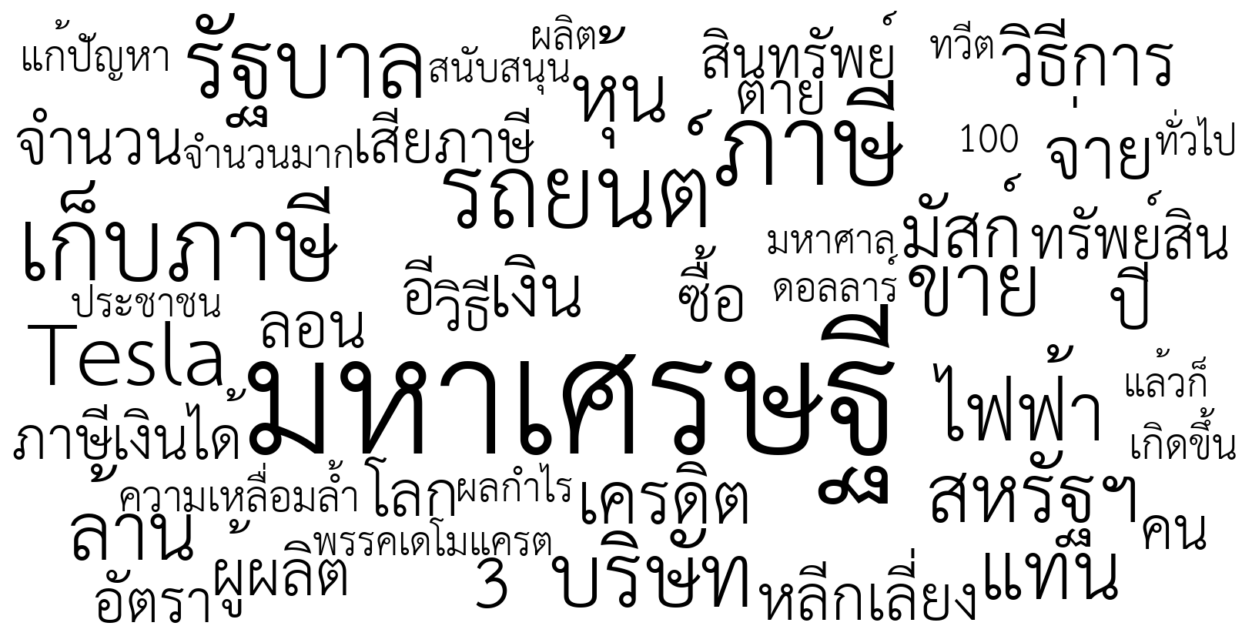

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 1600,
    height = 800,
    max_font_size = 300,
    prefer_horizontal = 1,
    background_color = 'white',
    color_func = lambda *args, **kwargs: "black",
    random_state=44,
    font_path='data/THSarabunNew.ttf'
)

filtered_counts = dict(c.most_common(50))

swc = wordcloud.generate_from_frequencies(filtered_counts)
plt.figure(figsize=(16, 8))
plt.imshow(swc, interpolation='bilinear')
plt.axis('off')
plt.show()